# Part 0: Explore The Data

In [121]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


file_path = 'Extra_data.csv'
data = pd.read_csv(file_path)
data

,Country,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia residual,Region,Happiness Score
0,Finland,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,2.762835,Western Europe,7.8087
1,Denmark,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,2.432741,Western Europe,7.6456
2,Switzerland,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,2.350267,Western Europe,7.5599
3,Iceland,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,2.460688,Western Europe,7.5045
4,Norway,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,2.168266,Western Europe,7.4880
...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,2.860198,Sub-Saharan Africa,3.4759
149,Rwanda,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,0.548445,Sub-Saharan Africa,3.3123
150,Zimbabwe,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,0.841031,Sub-Saharan Africa,3.2992
151,South Sudan,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.378751,Sub-Saharan Africa,2.8166


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       153 non-null    object 
 1   GDP per capita                153 non-null    float64
 2   Social support                153 non-null    float64
 3   Healthy life expectancy       153 non-null    float64
 4   Freedom to make life choices  153 non-null    float64
 5   Generosity                    153 non-null    float64
 6   Perceptions of corruption     153 non-null    float64
 7   Dystopia residual             153 non-null    float64
 8   Region                        153 non-null    object 
 9   Happiness Score               153 non-null    float64
dtypes: float64(8), object(2)
memory usage: 12.1+ KB


In [123]:
data.describe()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia residual,Happiness Score
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.00000
mean,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317,5.47324
std,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,0.563638,1.11227
min,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,0.257241,2.56690
25%,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.629928,4.72410
50%,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,2.046272,5.51500
75%,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,2.350267,6.22850
max,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,3.440810,7.80870


# Part 1: Data Cleaning

In [124]:
# Step 1: Handle Missing Values
for col in data.columns:
    if data[col].dtype in ['float64', 'int64']:
        data[col].fillna(data[col].median(), inplace = True)
    elif data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace = True)

# Step 2: Check and Correct Data Types
for col in data.select_dtypes(include = ['object']).columns:
    if col != 'Country' and col != 'Region':
        try:
            data[col] = data[col].astype(float)
        except ValueError:
            pass

# Step 3: Feature Selection
data = data.drop(columns = ['region'], errors = 'ignore')

# Step 4: Outlier Detection and Handling
numeric_columns = data.select_dtypes(include = ['float64', 'int64']).columns
for col in numeric_columns:
    data = data[(np.abs(zscore(data[col])) < 3)]

# Step 5: One-Hot Encoding for Categorical Variables
if 'region' in data.columns:
    data = pd.get_dummies(data, columns = ['region'], prefix = 'region')

print(data.info())

cleaned_file_path = 'cleaned_dataset.csv'
data.to_csv(cleaned_file_path, index = False)

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 2 to 151
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       144 non-null    object 
 1   GDP per capita                144 non-null    float64
 2   Social support                144 non-null    float64
 3   Healthy life expectancy       144 non-null    float64
 4   Freedom to make life choices  144 non-null    float64
 5   Generosity                    144 non-null    float64
 6   Perceptions of corruption     144 non-null    float64
 7   Dystopia residual             144 non-null    float64
 8   Region                        144 non-null    object 
 9   Happiness Score               144 non-null    float64
dtypes: float64(8), object(2)
memory usage: 12.4+ KB
None


/var/folders/qy/b_18rm712rs05n2ny8zwt7540000gn/T/ipykernel_26879/1565148958.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace = True)
/var/folders/qy/b_18rm712rs05n2ny8zwt7540000gn/T/ipykernel_26879/1565148958.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

# Part 2: Data Visualization

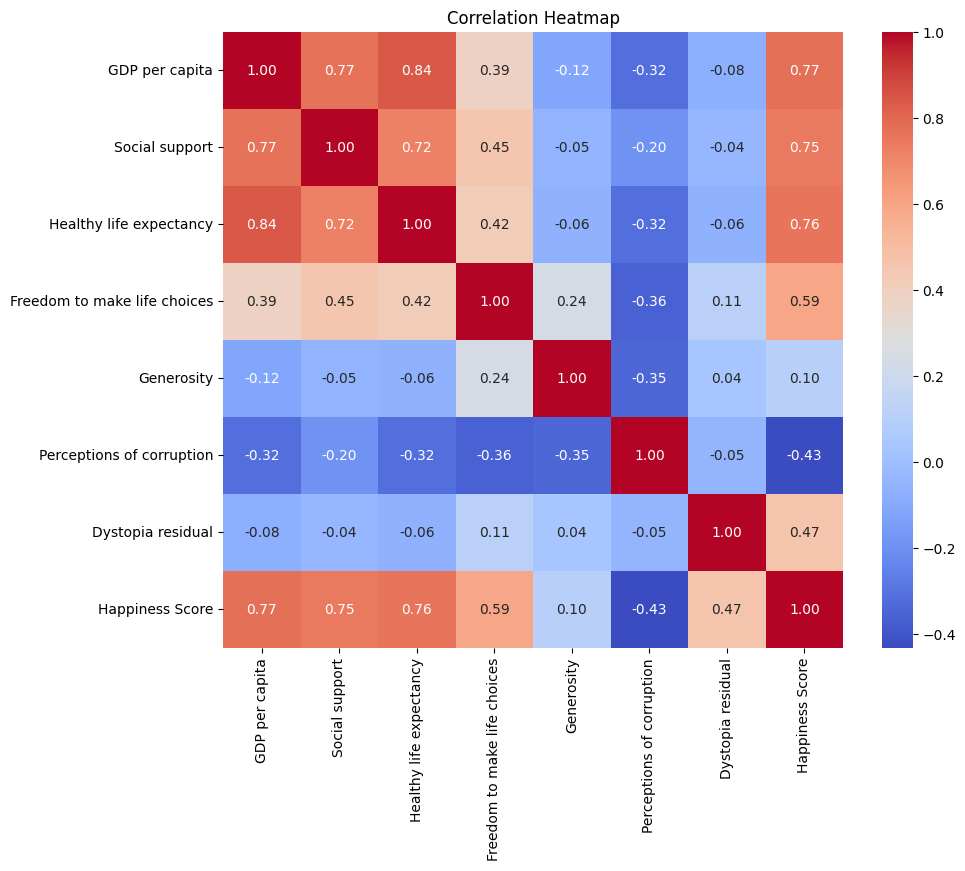

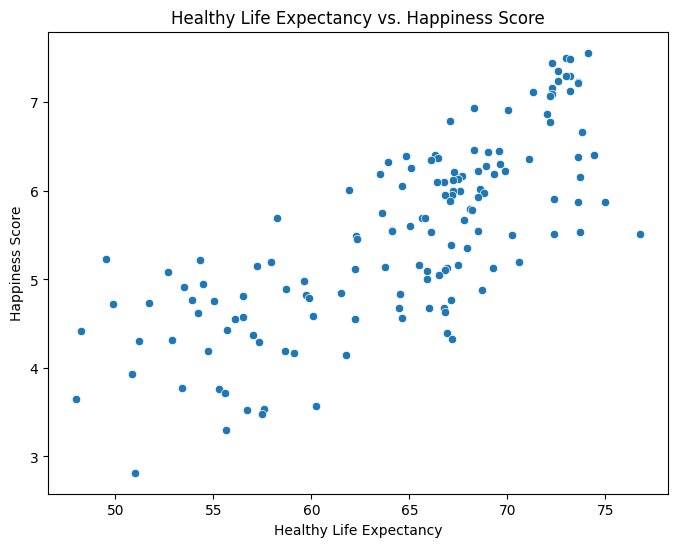

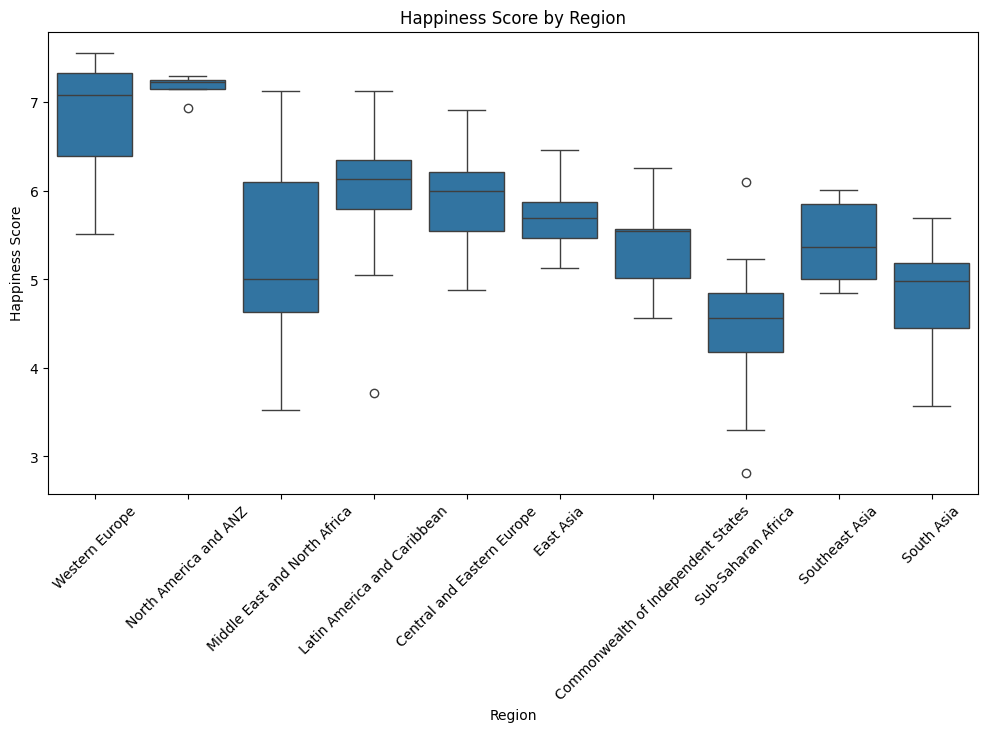

In [125]:
data = pd.read_csv(cleaned_file_path)

numeric_data = data.select_dtypes(include = ['float64', 'int64'])

# Plot 1: Correlation Heatmap
plt.figure(figsize = (10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Plot 2: Scatter Plot
plt.figure(figsize = (8, 6))
sns.scatterplot(x = data['Healthy life expectancy'], y = data['Happiness Score'])
plt.title('Healthy Life Expectancy vs. Happiness Score')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Happiness Score')
plt.show()

# Plot 3: Box Plot
if 'Region' in data.columns:
    plt.figure(figsize = (12, 6))
    sns.boxplot(x = 'Region', y = 'Happiness Score', data = data)
    plt.title('Happiness Score by Region')
    plt.xlabel('Region')
    plt.ylabel('Happiness Score')
    plt.xticks(rotation = 45)
    plt.show()

# Part 3: Modeling

In [120]:
data = pd.read_csv(cleaned_file_path)

if 'Region' in data.columns:
    data = pd.get_dummies(data, columns = ['Region'], drop_first = True)

target = 'Happiness Score'
features = data.drop(columns = ['Happiness Score', 'Country'], errors = 'ignore').columns

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state = 42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state = 42)
}

performance_summary = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate MSE and R^2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    performance_summary.append((name, mse, r2))
    
# Display
performance_df = pd.DataFrame(performance_summary, columns = ['Model', 'MSE', 'R^2 Score'])
print(performance_df)

                         Model       MSE  R^2 Score
0            Linear Regression  1.297403  -0.303328
1      Random Forest Regressor  1.175088  -0.180454
2  Gradient Boosting Regressor  1.727876  -0.735767
